# Other figures

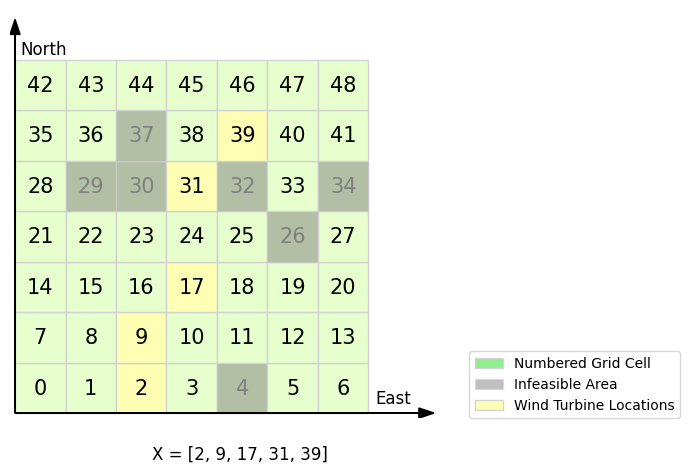

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.transforms import TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
import PIL
import urllib

# Create a 7x7 grid
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-0.1, 9)
ax.set_ylim(-0.1, 8)
ax.set_aspect('equal')

# Randomly pick 7 locations for infeasible areas
np.random.seed(0)  # For reproducibility
infeasible_indices = np.random.choice(range(49), size=7, replace=False)

# Randomly pick 5 locations for wind turbines
wind_turbine_indices = np.random.choice([i for i in range(49) if i not in infeasible_indices], size=5, replace=False)
wind_turbine_indices.sort()

# # Load wind turbine icon (now we do not use this icon)
# icon_path = 'https://github.com/ShitianZhang22/Wind-Farm-Layout-Optimisation/blob/main/icon/turbine.png?raw=true'
# icon = np.array(PIL.Image.open(urllib.request.urlopen(icon_path)))

# Draw grid cells with light green filling and light grey borders
for i in range(7):
    for j in range(7):
        if j * 7 + i in infeasible_indices:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(0.9, 1, 0.8)))
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor='grey', alpha=0.5))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='grey', ha='center', va='center', fontsize=15)
        elif j * 7 + i in wind_turbine_indices:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(1, 1, 0.7)))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='black', ha='center', va='center', fontsize=15)
            # imagebox = OffsetImage(icon, zoom=0.7)
            # ab = AnnotationBbox(imagebox, (i + 0.5, j + 0.5), frameon=False)
            # ax.add_artist(ab)
        else:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(0.9, 1, 0.8)))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='black', ha='center', va='center', fontsize=15)

# Draw axes
ax.arrow(0, 0, 8, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')  # East axis
ax.arrow(0, 0, 0, 7.5, head_width=0.2, head_length=0.3, fc='black', ec='black')  # North axis
ax.text(7.5, 0.2, 'East', color='black', fontsize=12, ha='center')
ax.text(0.1, 7.2, 'North', color='black', fontsize=12, va='center') 
    
# Add legend
legend_elements = [
    mpatches.Patch(facecolor='lightgreen', edgecolor='lightgrey', label='Numbered Grid Cell'),
    mpatches.Patch(facecolor='grey', edgecolor='lightgrey', alpha=0.5, label='Infeasible Area'),
    mpatches.Patch(facecolor=(1, 1, 0.7), edgecolor='lightgrey', label='Wind Turbine Locations'),
]
ax.legend(handles=legend_elements, loc=(1, 0), fontsize=10)

# Add layout vector formula
layout_vector = f"X = [{', '.join(map(str, wind_turbine_indices))}]"
ax.text(0.5, -0.1, layout_vector, fontsize=12, ha='center', transform=ax.transAxes)

# Remove axes
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
_wind_data = np.array([[2.3046875, 0.0390625],
                       [3.1015625, 0.125    ],
                       [2.8203125, 0.09375  ],
                       [2.5      , 0.078125 ],
                       [3.9375   , 0.140625 ],
                       [4.2890625, 0.2265625],
                       [3.9296875, 0.2265625],
                       [2.9140625, 0.078125 ]])
# directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
directions = ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE']
_wind_data = np.flip(_wind_data, 0)
print(_wind_data)
_wind_data = np.concatenate((_wind_data[5:], _wind_data[:5]), axis=0)
print(_wind_data)


[[2.9140625 0.078125 ]
 [3.9296875 0.2265625]
 [4.2890625 0.2265625]
 [3.9375    0.140625 ]
 [2.5       0.078125 ]
 [2.8203125 0.09375  ]
 [3.1015625 0.125    ]
 [2.3046875 0.0390625]]
[[2.8203125 0.09375  ]
 [3.1015625 0.125    ]
 [2.3046875 0.0390625]
 [2.9140625 0.078125 ]
 [3.9296875 0.2265625]
 [4.2890625 0.2265625]
 [3.9375    0.140625 ]
 [2.5       0.078125 ]]


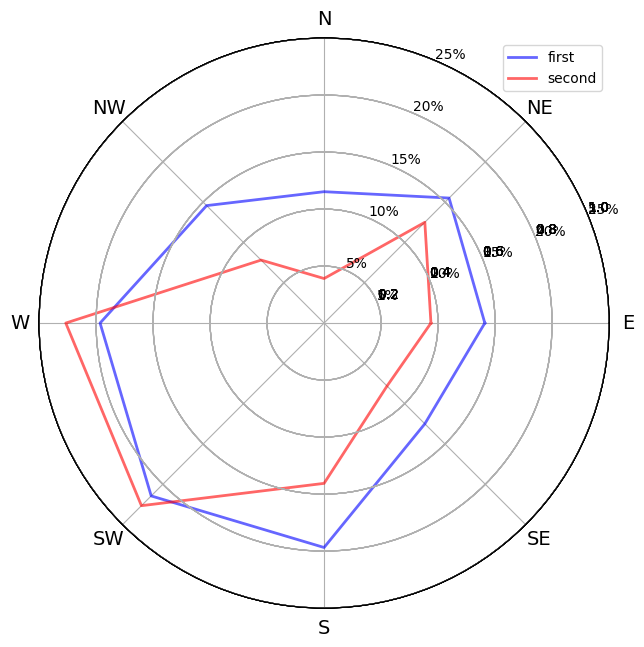

In [ ]:
class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.linspace(0, 360, self.n, endpoint=False).tolist()
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, [22, 67], labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        plt.rgrids([1, 2, 3, 4, 5], labels=["5%", "10%", "15%", "20%", "25%"], angle=22)
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        


fig = plt.figure(figsize=(6, 6))

labels = [
    ['1', '2', '3', '4', '5'], 
    ["5%", "10%", "15%", "20%", "25%"],
]

radar = Radar(fig, directions, labels)
radar.plot(_wind_data[:, 0],  "-", lw=2, color="b", alpha=0.6, label="first")
radar.plot(_wind_data[:, 1] * 20, "-", lw=2, color="r", alpha=0.6, label="second")
radar.ax.legend()

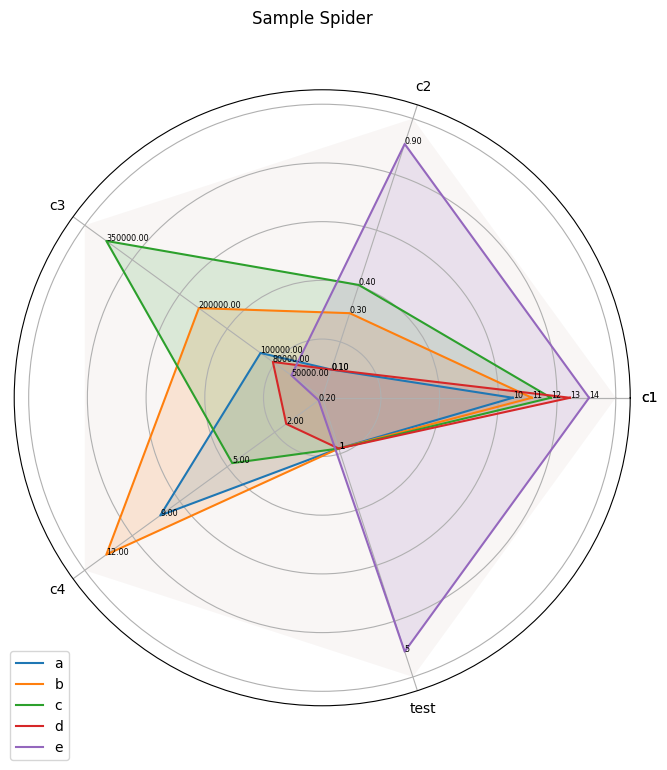

In [10]:
# adopted at https://stackoverflow.com/questions/24659005/radar-chart-with-multiple-scales-on-multiple-axes

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def spider(df, *, id_column, title=None, max_values=None, padding=1.25):
    categories = df._get_numeric_data().columns.tolist()
    data = df[categories].to_dict(orient='list')
    ids = df[id_column].tolist()
    if max_values is None:
        max_values = {key: padding*max(value) for key, value in data.items()}
        
    normalized_data = {key: np.array(value) / max_values[key] for key, value in data.items()}
    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        for _x, _y, t in zip(angles, values, actual_values):
            t = f'{t:.2f}' if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size='xx-small')
            
    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    if title is not None: plt.suptitle(title)
    plt.show()
    
radar = spider

spider(
    pd.DataFrame({
        'x': [*'abcde'],
        'c1': [10,11,12,13,14],
        'c2': [0.1, 0.3, 0.4, 0.1, 0.9],
        'c3': [1e5, 2e5, 3.5e5, 8e4, 5e4],
        'c4': [9, 12, 5, 2, 0.2],
        'test': [1,1,1,1,5]
    }),
    id_column='x',
    title='Sample Spider',
    padding=1.1
)

/tmp/ipykernel_1277/11144286.py:3: MatplotlibDeprecationWarning: Passing label as a length 8 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(angles, _wind_data[:, 0], label=directions)


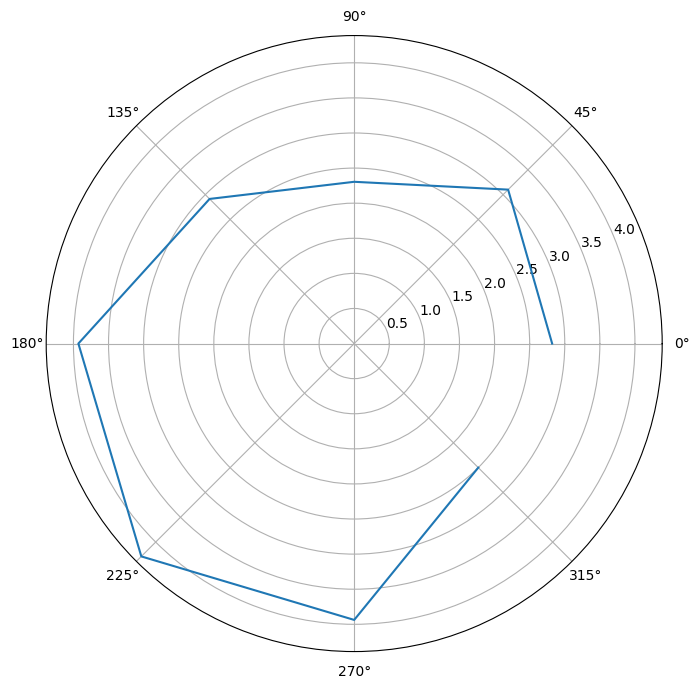

In [19]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False).tolist()
ax.plot(angles, _wind_data[:, 0], label=directions)
